In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [61]:
TOP = os.getcwd().replace('notebooks', '')
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
import sys

In [4]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [5]:
from model_functions import *

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [6]:
#df = pd.read_excel(interim_dir+'tsca_categorisation_290624_wmappingdict.xlsx', index_col = [0])

In [7]:
#data = mk_fp(df)

In [8]:
data = pd.read_csv(processed_dir+'Mgrn_FP.csv', index_col = [0])

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.spatial.distance import pdist

In [28]:
sample_size = 2500  # Adjust this based on memory constraints

# Randomly sample rows from the DataFrame
data_sample = data.sample(n=sample_size, random_state=42).values  # Convert to NumPy array

# Compute pairwise distances for the sampled subset of points
sampled_distances = pdist(data_sample, metric='jaccard')  # This returns a condensed distance array

# Calculate ECDF on the sampled distances
ecdf = ECDF(sampled_distances)

# Generate ECDF x and y values
xm = np.linspace(sampled_distances.min(), sampled_distances.max(), 1000)
ym = ecdf(xm)



In [11]:
txps = (pd.concat([pd.read_excel(processed_dir+'txps_first10000.xlsx')
 .set_index('DTXSID')
 .drop(['INPUT', 'FOUND_BY', 'PREFERRED_NAME', 'SMILES'], axis = 1),
            pd.read_excel(processed_dir+'txps_next10000.xlsx')
 .set_index('DTXSID')
 .drop(['INPUT', 'FOUND_BY', 'PREFERRED_NAME', 'SMILES'], axis = 1)]
                 )

)

In [13]:
txps.index.nunique()

14247

In [14]:
txps.shape

(14247, 729)

In [26]:


txps_sample = txps.sample(n=2500, random_state=42).values  # Convert to NumPy array

# Compute pairwise distances for the sampled subset of points
sampled_txps = pdist(txps_sample,metric='jaccard')  # This returns a condensed distance array

# Calculate ECDF on the sampled distances


In [27]:
ecdf_txp = ECDF(sampled_txps)

# Generate ECDF x and y values
xt = np.linspace(sampled_txps.min(), sampled_txps.max(), 1000)
yt = ecdf_txp(xt)


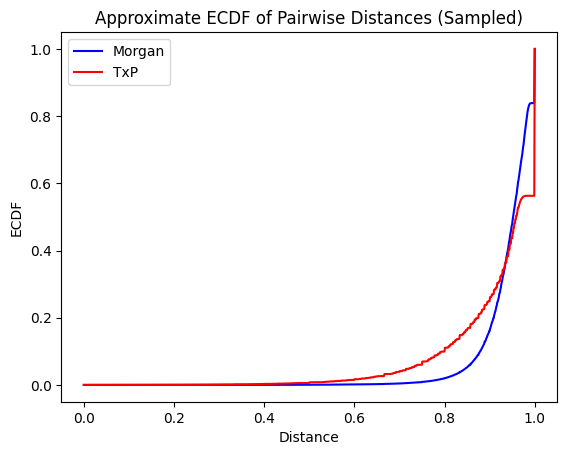

In [29]:
plt.plot(xm, ym,color = 'b', label = 'Morgan')
plt.plot(xt, yt, color = 'r', label = 'TxP')
plt.xlabel("Distance")
plt.ylabel("ECDF")
plt.title("Approximate ECDF of Pairwise Distances (Sampled)")
plt.legend()
plt.show()

In [48]:
def make_ecdfs(data, sample_size = 1000):
        data_sample = data.sample(n=sample_size).values  # Convert to NumPy array
        sampled_distances = pdist(data_sample, metric='jaccard')  # This returns a condensed distance array
        ecdf = ECDF(sampled_distances)
        xm = np.linspace(sampled_distances.min(), sampled_distances.max(), 1000)
        ym = ecdf(xm)
        return xm, ym

In [49]:
mylst = []
for i in range(0,10):
    a, b = make_ecdfs(data, sample_size = 1000)
    mylst.append([a,b])

In [53]:
mylst1 = []
for i in range(0,10):
    a, b = make_ecdfs(data = txps, sample_size = 1000)
    mylst1.append([a,b])

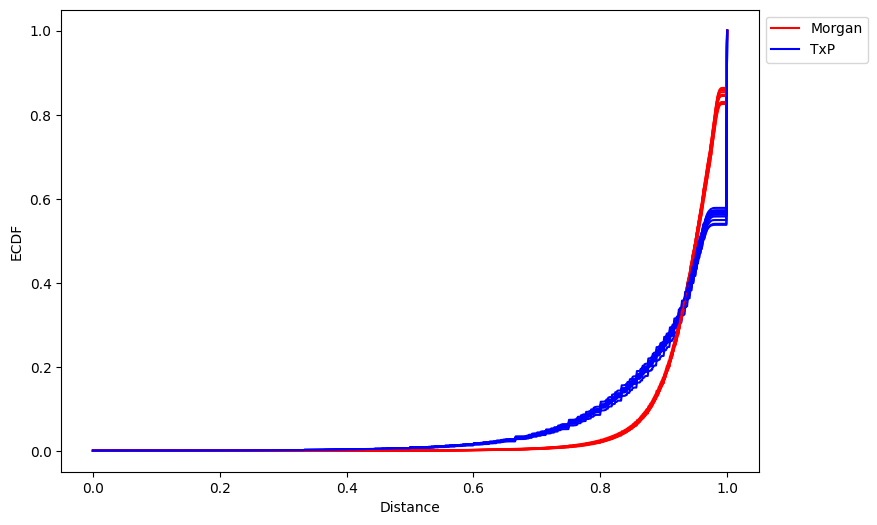

In [62]:
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(mylst)):
    ax.set_xlabel('Distance')
    ax.set_ylabel('ECDF')
    #ax.set_title('ECDFs of within Category-Subcategory combinations')
    ax.plot(mylst[i][0],mylst[i][1], color = 'r', label = 'Morgan' if i ==0 else "")
    ax.plot(mylst1[i][0],mylst1[i][1], color = 'b', label = 'TxP' if i == 0 else "")
ax.legend(bbox_to_anchor=(1, 1))
fig.savefig(figures_dir+'FigureS10_051124.png', dpi = 300, bbox_inches='tight')